<a href="https://colab.research.google.com/github/Rahulk14/ML_LAB/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings("ignore")

In [6]:
Df = pd.read_csv('/content/SPY.csv')
Df= Df.dropna()

Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2017,215.6950,216.4522,214.5867,215.8867,91366522
04-01-2017,216.2509,217.3340,216.2413,217.1710,78744433
05-01-2017,216.8739,217.1710,216.1167,216.9985,78379012
06-01-2017,217.1231,218.2924,216.5193,217.7749,71559922
09-01-2017,217.4873,217.6408,217.0141,217.0560,46939676


In [7]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X= Df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
03-01-2017,-0.1917,1.8655
04-01-2017,-0.9201,1.0927
05-01-2017,-0.1246,1.0543
06-01-2017,-0.6518,1.7731
09-01-2017,0.4313,0.6267


In [13]:
cls = SVC().fit(X_train, y_train)

In [8]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

In [9]:
split_percentage = 0.8
split = int(split_percentage*len(Df))


X_train = X[:split]
y_train = y[:split] 


X_test = X[split:]
y_test = y[split:]

In [12]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))



Train Accuracy: 57.00%
Test Accuracy: 54.90%


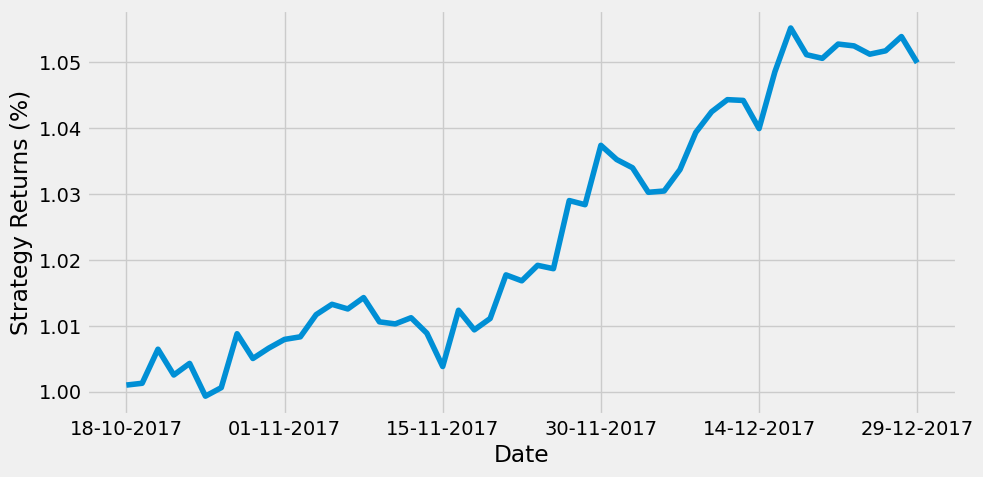

In [14]:
Df['Predicted_Signal'] = cls.predict(X)


Df['Return'] = Df.Close.pct_change()


Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal


geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()


geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()